In [1]:
import json
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, LineString

C:\Users\secan\Anaconda3\envs\visualization\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [7]:
edges = gpd.read_file('antofa_edges.geojson')
meeting_points = gpd.read_file('puntos_encuentro_antofa.geojson')
with open('shortest_paths.json') as file:
    shortest_paths = json.load(file)
zones = gpd.read_file('zone/ZONA_C17.shp')

In [10]:
zones.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry
0,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,16,2101011016,0.080913,0.000162,POLYGON ((-70.38032712899997 -23.5438802519999...
1,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,19,2101011019,0.054746,0.000070,POLYGON ((-70.39531089899998 -23.5536356989999...
2,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,8,2101011008,0.032163,0.000041,POLYGON ((-70.38298961399994 -23.5670051359999...
3,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,14,2101011014,0.045245,0.000083,POLYGON ((-70.38433839799995 -23.5647919219999...
4,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,3,2101011003,0.066789,0.000075,POLYGON ((-70.39095434399997 -23.5654404269999...


In [17]:
dist = gpd.read_file('zone/DISTRITO_C17.shp')
dist.head()

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,COD_DISTRI,TIPO_DISTR,SHAPE_Leng,SHAPE_Area,geometry
0,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,11,RURAL,5.284162,0.573837,POLYGON ((-70.01287206699993 -23.0633924279999...
1,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,14,MIXTO,0.176305,0.001076,POLYGON ((-70.33794645999996 -23.5763233759999...
2,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,2,MIXTO,0.147621,0.000508,POLYGON ((-70.37218859699993 -23.5918763869999...
3,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,16,URBANO,0.120099,0.000324,POLYGON ((-70.38739307899993 -23.5919892099999...
4,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,15,MIXTO,0.154252,0.000486,POLYGON ((-70.37128881599995 -23.6010792849999...


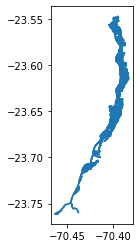

In [29]:
ax = zones[zones.contains(edges)].plot()
edges.plot(ax=ax)

Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone
Zone


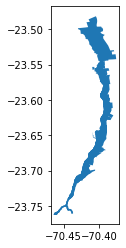

In [68]:
def contains_edges(zone):
    print("Zone")
    return edges.within(zone).any()
filtered_zones = zones[zones.geometry.apply(contains_edges)]
ax = filtered_zones.plot()
edges.plot(ax=ax)

In [69]:
filtered_zones

,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,DISTRITO,LOC_ZON,GEOCODIGO,SHAPE_Leng,SHAPE_Area,geometry
1,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,19,2101011019,0.054746,0.000070,POLYGON ((-70.39531089899998 -23.5536356989999...
3,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,14,2101011014,0.045245,0.000083,POLYGON ((-70.38433839799995 -23.5647919219999...
4,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,3,2101011003,0.066789,0.000075,POLYGON ((-70.39095434399997 -23.5654404269999...
9,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,11,2101011011,0.017281,0.000012,POLYGON ((-70.39080217499998 -23.5781875979999...
10,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,1,1,2101011001,0.069676,0.000088,POLYGON ((-70.39089506499994 -23.5772469539999...
19,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,16,1,2101161001,0.061440,0.000063,POLYGON ((-70.38739307899993 -23.5919892099999...
24,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,16,4,2101161004,0.039388,0.000077,POLYGON ((-70.38456200399997 -23.6075056279999...
28,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,15,2,2101151002,0.023726,0.000030,POLYGON ((-70.38094334899995 -23.6038515649999...
29,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,16,3,2101161003,0.043669,0.000086,POLYGON ((-70.38645766999997 -23.6078096499999...
34,2,REGIÃN DE ANTOFAGASTA,21,ANTOFAGASTA,2101,ANTOFAGASTA,ANTOFAGASTA,16,2,2101161002,0.043850,0.000081,POLYGON ((-70.38584987399997 -23.6177549889999...


In [70]:
filtered_zones.crs

{'init': 'epsg:4674'}

In [71]:
edges.crs

{'init': 'epsg:4326'}

In [77]:
filtered_zones.to_crs(edges.crs).to_json?

Object `to_json` not found.


In [79]:
filtered_zones.to_crs(edges.crs).to_file("zones.json", driver="GeoJSON", encoding='latin1')